In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [17]:
# 日本語のフォント設定
rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [18]:
# データの読み込み
df = pd.read_csv('../data/SSDSE-B-2025.csv', encoding='shift_jis')

In [19]:
# 基本統計を表示
def basic_statistics(df):
    key_indicators = [
        '消費支出(二人以上の世帯)',
        '教育費(二人以上の世帯)',
        '保健医療費(二人以上の世帯)',
        '中学校卒業者のうち進学者数',
        '高等学校卒業者のうち進学者数',
        '一般病院数',
        '一般診療所数',
        '転入者数(日本人移動者)',
        '転出者数(日本人移動者)',
    ]

    # 基本統計量
    for indicator in key_indicators:
        if indicator in df.columns:
            print(f"{indicator}の基本統計量:")
            print(f"平均: {df[indicator].mean():.2f}")
            print(f"標準偏差: {df[indicator].std():.2f}")
            print(f"最大値: {df[indicator].max():.2f} (都道府県: {df[df[indicator] == df[indicator].max()]['都道府県'].iloc[0]})")
            print(f"最小値: {df[indicator].min():.2f} (都道府県: {df[df[indicator] == df[indicator].min()]['都道府県'].iloc[0]})")

In [20]:
print("基本統計量の表示")
print(f"データ形状: {df.shape}")
print(f"年度範囲: {df['年度'].min()}年 - {df['年度'].max()}年")
print(f"都道府県数: {df['都道府県'].nunique()}県")
print(df.columns.tolist())

基本統計量の表示
データ形状: (564, 112)
年度範囲: 2011年 - 2022年
都道府県数: 47県
['年度', '地域コード', '都道府県', '総人口', '総人口（男）', '総人口（女）', '日本人人口', '日本人人口（男）', '日本人人口（女）', '15歳未満人口', '15歳未満人口（男）', '15歳未満人口（女）', '15〜64歳人口', '15〜64歳人口（男）', '15〜64歳人口（女）', '65歳以上人口', '65歳以上人口（男）', '65歳以上人口（女）', '出生数', '出生数（男）', '出生数（女）', '合計特殊出生率', '死亡数', '死亡数（男）', '死亡数（女）', '転入者数（日本人移動者）', '転入者数（日本人移動者）（男）', '転入者数（日本人移動者）（女）', '転出者数（日本人移動者）', '転出者数（日本人移動者）（男）', '転出者数（日本人移動者）（女）', '婚姻件数', '離婚件数', '年平均気温', '最高気温（日最高気温の月平均の最高値）', '最低気温（日最低気温の月平均の最低値）', '降水日数（年間）', '降水量（年間）', '着工建築物数', '着工建築物床面積', '旅館営業施設数（ホテルを含む）', '旅館営業施設客室数（ホテルを含む）', '標準価格（平均価格）（住宅地）', '標準価格（平均価格）（商業地）', '幼稚園数', '幼稚園教員数', '幼稚園在園者数', '小学校数', '小学校教員数', '小学校児童数', '中学校数', '中学校教員数', '中学校生徒数', '中学校卒業者数', '中学校卒業者のうち進学者数', '高等学校数', '高等学校教員数', '高等学校生徒数', '高等学校卒業者数', '高等学校卒業者のうち進学者数', '短期大学数', '大学数', '短期大学教員数', '大学教員数', '短期大学学生数', '大学学生数', '短期大学卒業者数', '短期大学卒業者のうち進学者数', '大学卒業者数', '大学卒業者のうち進学者数', '専修学校数', '各種学校数', '専修学校生徒数', '各種学校生徒数', '新規求職申込件数（一般）', '月間有効求職者数（一般）', '月間有効求人数（一般）'

In [21]:
# 派生指標の計算
def calculate_derived_indicators(df):
    # 進学率の計算
    df['中学進学率'] = (df['中学校卒業者のうち進学者数'] / df['中学校卒業者数'] * 100).round(2)
    df['高校進学率'] = (df['高等学校卒業者のうち進学者数'] / df['高等学校卒業者数'] * 100).round(2)

    # 人口当たりの医療施設数
    df['病院密度'] = (df['一般病院数'] / df['総人口'] * 100000).round(2)
    df['診療所密度'] = (df['一般診療所数'] / df['総人口'] * 100000).round(2)

    # 人口移動のバランス
    df['人口移動バランス'] = df['転入者数（日本人移動者）'] - df['転出者数（日本人移動者）']

    # 高齢化率
    df['高齢化率'] = (df['65歳以上人口'] / df['総人口'] * 100).round(2)

    # 教育費比率(消費支出に占める教育費の割合)
    df['教育費比率'] = (df['教育費（二人以上の世帯）'] / df['消費支出（二人以上の世帯）'] * 100).round(2)
    
    return df

In [22]:
print("利用可能な列名:")
print(df.columns.tolist())

利用可能な列名:
['年度', '地域コード', '都道府県', '総人口', '総人口（男）', '総人口（女）', '日本人人口', '日本人人口（男）', '日本人人口（女）', '15歳未満人口', '15歳未満人口（男）', '15歳未満人口（女）', '15〜64歳人口', '15〜64歳人口（男）', '15〜64歳人口（女）', '65歳以上人口', '65歳以上人口（男）', '65歳以上人口（女）', '出生数', '出生数（男）', '出生数（女）', '合計特殊出生率', '死亡数', '死亡数（男）', '死亡数（女）', '転入者数（日本人移動者）', '転入者数（日本人移動者）（男）', '転入者数（日本人移動者）（女）', '転出者数（日本人移動者）', '転出者数（日本人移動者）（男）', '転出者数（日本人移動者）（女）', '婚姻件数', '離婚件数', '年平均気温', '最高気温（日最高気温の月平均の最高値）', '最低気温（日最低気温の月平均の最低値）', '降水日数（年間）', '降水量（年間）', '着工建築物数', '着工建築物床面積', '旅館営業施設数（ホテルを含む）', '旅館営業施設客室数（ホテルを含む）', '標準価格（平均価格）（住宅地）', '標準価格（平均価格）（商業地）', '幼稚園数', '幼稚園教員数', '幼稚園在園者数', '小学校数', '小学校教員数', '小学校児童数', '中学校数', '中学校教員数', '中学校生徒数', '中学校卒業者数', '中学校卒業者のうち進学者数', '高等学校数', '高等学校教員数', '高等学校生徒数', '高等学校卒業者数', '高等学校卒業者のうち進学者数', '短期大学数', '大学数', '短期大学教員数', '大学教員数', '短期大学学生数', '大学学生数', '短期大学卒業者数', '短期大学卒業者のうち進学者数', '大学卒業者数', '大学卒業者のうち進学者数', '専修学校数', '各種学校数', '専修学校生徒数', '各種学校生徒数', '新規求職申込件数（一般）', '月間有効求職者数（一般）', '月間有効求人数（一般）', '充足数（一般）', '就職件数（一般）', '一般旅券発行件数', '延べ宿泊者数', '外

In [23]:
# 派生指標の計算と表示
print("派生指標の計算")
df = calculate_derived_indicators(df)

派生指標の計算


In [24]:
def regional_ranking(df, indicator, year=None):
    if year:
        df_year = df[df['年度'] == year].copy()
    else:
        # 最新年度を自動で取得
        latest_year = df['年度'].max()
        df_year = df[df['年度'] == latest_year].copy()

    # データを降順にソート
    ranking = df_year[['都道府県', indicator]].sort_values(by=indicator, ascending=False).reset_index(drop=True)

    print(f"\n--- {indicator} ランキング ({int(latest_year)}年) ---")

    # 上位10位の表示
    print("\n【上位10位】")
    for i, row in ranking.head(10).iterrows():
        print(f"{i+1:2d}位: {row['都道府県']:<6} {row[indicator]:>10.2f}")

    # 下位5位の表示
    print("\n【下位5位】")
    # reset_index()しているので、単純にtailで取得可能
    for i, row in ranking.tail(5).iterrows():
        print(f"{i+1:2d}位: {row['都道府県']:<6} {row[indicator]:>10.2f}")

    return ranking

# --- 関数の呼び出し例 ---
# regional_ranking(df, '消費支出（二人以上の世帯）')
# regional_ranking(df, '高校進学率')
# regional_ranking(df, '病院密度')

In [25]:
print(f"\n {df['年度'].max()}年のランキング")
regional_ranking(df, '消費支出（二人以上の世帯）')
regional_ranking(df, '高校進学率')
regional_ranking(df, '病院密度')


 2022年のランキング

--- 消費支出（二人以上の世帯） ランキング (2022年) ---

【上位10位】
 1位: 埼玉県     324793.00
 2位: 東京都     321633.00
 3位: 滋賀県     319456.00
 4位: 愛知県     319344.00
 5位: 富山県     316801.00
 6位: 山口県     315225.00
 7位: 岐阜県     313314.00
 8位: 群馬県     310407.00
 9位: 石川県     305812.00
10位: 千葉県     304582.00

【下位5位】
43位: 大阪府     265161.00
44位: 和歌山県    263910.00
45位: 沖縄県     251735.00
46位: 青森県     249660.00
47位: 愛媛県     245054.00

--- 高校進学率 ランキング (2022年) ---

【上位10位】
 1位: 京都府         72.99
 2位: 東京都         72.71
 3位: 神奈川県        68.02
 4位: 大阪府         67.53
 5位: 兵庫県         67.04
 6位: 広島県         64.61
 7位: 埼玉県         64.54
 8位: 奈良県         63.88
 9位: 愛知県         62.79
10位: 福井県         62.61

【下位5位】
43位: 秋田県         47.52
44位: 岩手県         47.52
45位: 山口県         46.88
46位: 鹿児島県        46.33
47位: 沖縄県         46.20

--- 病院密度 ランキング (2022年) ---

【上位10位】
 1位: 高知県         15.98
 2位: 徳島県         12.93
 3位: 鹿児島県        12.35
 4位: 大分県         11.38
 5位: 宮崎県         10.93
 6位: 佐賀県         10.24
 7位: 熊本県          9.6

,都道府県,病院密度
0,高知県,15.98
1,徳島県,12.93
2,鹿児島県,12.35
3,大分県,11.38
4,宮崎県,10.93
5,佐賀県,10.24
6,熊本県,9.60
7,長崎県,9.28
8,愛媛県,9.26
9,北海道,9.05



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


/var/folders/kz/6prdcpwx2m515zlcfh2z9gpc0000gn/T/ipykernel_18353/209561575.py:22: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  plt.savefig('bar_chart_single_color.png', dpi=300, bbox_inches='tight')
/var/folders/kz/6prdcpwx2m515zlcfh2z9gpc0000gn/T/ipykernel_18353/209561575.py:22: UserWarning: Glyph 30693 (\N{CJK UNIFIED IDEOGRAPH-77E5}) missing from font(s) DejaVu Sans.
  plt.savefig('bar_chart_single_color.png', dpi=300, bbox_inches='tight')
/var/folders/kz/6prdcpwx2m515zlcfh2z9gpc0000gn/T/ipykernel_18353/209561575.py:22: UserWarning: Glyph 30476 (\N{CJK UNIFIED IDEOGRAPH-770C}) missing from font(s) DejaVu Sans.
  plt.savefig('bar_chart_single_color.png', dpi=300, bbox_inches='tight')
/var/folders/kz/6prdcpwx2m515zlcfh2z9gpc0000gn/T/ipykernel_18353/209561575.py:22: UserWarning: Glyph 24499 (\N{CJK UNIFIED IDEOGRAPH-5FB3}) missing from font(s) DejaVu Sans.
  plt.savefig('bar_chart_single_color.png', dpi=300, bbox_inches='tight')
/var/fol

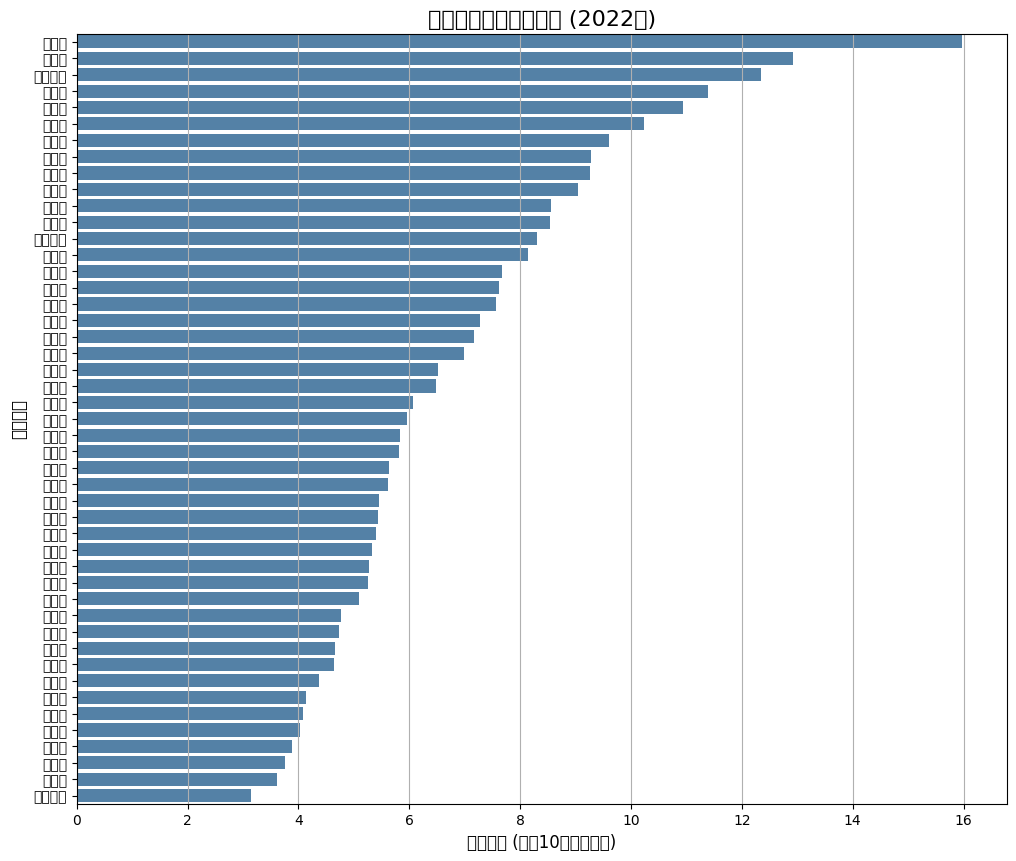

単色版の棒グラフを 'bar_chart_single_color.png' として保存しました。


In [26]:
!pip install japanize-matplotlib
import japanize_matplotlib

# 最新年度のデータに絞り、病院密度でソート
latest_year = df['年度'].max()
df_latest_sorted = df[df['年度'] == latest_year].sort_values('病院密度', ascending=False)

# 棒グラフの作成
plt.figure(figsize=(12, 10))

# ★★★ ここを修正 ★★★
# hueとpaletteを削除し、color引数で単一の色を指定します
sns.barplot(data=df_latest_sorted, x='病院密度', y='都道府県', color='steelblue')

# グラフのタイトルと軸ラベルを設定
plt.title(f'都道府県別の病院密度 ({int(latest_year)}年)', fontsize=16)
plt.xlabel('病院密度 (人口10万人あたり)', fontsize=12)
plt.ylabel('都道府県', fontsize=12)
plt.grid(axis='x')

# 画像として保存
plt.savefig('bar_chart_single_color.png', dpi=300, bbox_inches='tight')

# グラフを表示
plt.show()

print("単色版の棒グラフを 'bar_chart_single_color.png' として保存しました。")


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


/Users/mizuki/statistics/.venv/lib/python3.10/site-packages/adjustText/__init__.py:419: UserWarning: Glyph 30149 (\N{CJK UNIFIED IDEOGRAPH-75C5}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/Users/mizuki/statistics/.venv/lib/python3.10/site-packages/adjustText/__init__.py:419: UserWarning: Glyph 38498 (\N{CJK UNIFIED IDEOGRAPH-9662}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/Users/mizuki/statistics/.venv/lib/python3.10/site-packages/adjustText/__init__.py:419: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/Users/mizuki/statistics/.venv/lib/python3.10/site-packages/adjustText/__init__.py:419: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/Users/mizuki/statistics/.venv/lib/python3.10/site-packages/adjustText/__init__.py:419: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDE

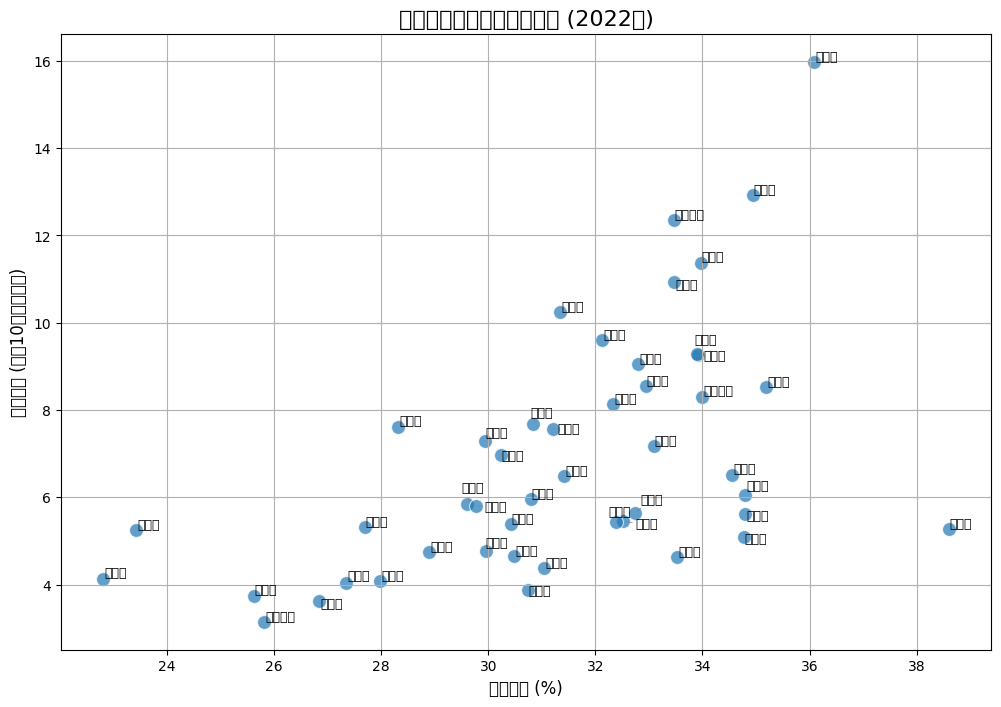

ラベル調整済みの散布図を 'scatter_plot_adjusted.png' として保存しました。


In [27]:
!pip install adjustText
from adjustText import adjust_text

# 最新年度のデータに絞り込む
latest_year = df['年度'].max()
df_latest = df[df['年度'] == latest_year].copy()

# 散布図の作成
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_latest, x='高齢化率', y='病院密度', s=100, alpha=0.7)

# グラフのタイトルと軸ラベルを設定
plt.title(f'高齢化率と病院密度の関係 ({int(latest_year)}年)', fontsize=16)
plt.xlabel('高齢化率 (%)', fontsize=12)
plt.ylabel('病院密度 (人口10万人あたり)', fontsize=12)
plt.grid(True)

# 各点のテキストラベルをリストに格納
texts = []
for i, row in df_latest.iterrows():
    texts.append(plt.text(row['高齢化率'], row['病院密度'], row['都道府県'], fontsize=9))

# adjust_text を使ってラベルの重なりを自動調整
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
# ★★★ ここまで ★★★

# 画像として保存
plt.savefig('scatter_plot_adjusted.png', dpi=300, bbox_inches='tight')

# グラフを表示
plt.show()

print("ラベル調整済みの散布図を 'scatter_plot_adjusted.png' として保存しました。")

In [28]:
!pip install statsmodels
import statsmodels.api as sm

# 散布図で使った最新年度のデータフレーム df_latest を使用します
# Xに説明変数（高齢化率）、yに目的変数（病院密度）をセット
X = df_latest['高齢化率']
y = df_latest['病院密度']

# 定数項（切片）を追加します
X = sm.add_constant(X)

# モデルを定義して学習させます
model = sm.OLS(y, X)
results = model.fit()

# 分析結果のサマリーを表示
print(results.summary())


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
                            OLS Regression Results                            
Dep. Variable:                   病院密度   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     18.56
Date:                Wed, 20 Aug 2025   Prob (F-statistic):           8.81e-05
Time:                        17:23:49   Log-Likelihood:                -105.64
No. Observations:                  47   AIC:                             215.3
Df Residuals:                      45   BIC:                             219.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------